# INTRODUCTION AND BUSINESS OBJECTIVE

To estimate the severity of a collision and find design defects, an automaker examines collision data, which includes driver behaviour and vehicle type. Improving vehicle safety and occupant protection is the aim, which will eventually lead to fewer injuries from traffic accidents.

# MODELLING TASK

In order to identify design defects and direct improvements that support vehicle safety and lessen accident consequences, the project use predictive analytics on a large volume of vehicle and crash data to evaluate the severity of accidents.

# CLASSIFICATION PROBLEM

The research uses categorization algorithms to improve automobile safety systems by forecasting crash intensity. It develops a model to anticipate the severity of auto crashes based on variables such as vehicle type and road conditions.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(palette="Set2")
pd.set_option('display.max_columns', None)

# setting logging to print only error messages from Sklearnex
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

**Loading the Dataset**

In [2]:
col1_to_load = ['accident_index','vehicle_type','towing_and_articulation','vehicle_manoeuvre','vehicle_location_restricted_lane','junction_location','skidding_and_overturning','first_point_of_impact','vehicle_left_hand_drive','sex_of_driver','age_band_of_driver','engine_capacity_cc','propulsion_code','age_of_vehicle','generic_make_model']
col2_to_load = ['accident_index','longitude','latitude','road_type','speed_limit','light_conditions','weather_conditions','road_surface_conditions','special_conditions_at_site','carriageway_hazards','urban_or_rural_area','accident_severity']
col3_to_load = ['accident_index','casualty_class','sex_of_casualty','casualty_severity','age_band_of_casualty','car_passenger','casualty_type']

In [5]:
df_vehicle = pd.read_csv('dft-road-casualty-statistics-vehicle-2022 (2).csv', usecols =col1_to_load )
df_collision = pd.read_csv('dft-road-casualty-statistics-collision-2022 (1).csv',usecols =col2_to_load )
df_casualty = pd.read_csv('dft-road-casualty-statistics-casualty-2022 (2).csv',usecols =col3_to_load )

C:\Users\sanni\AppData\Local\Temp\ipykernel_26512\871661305.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vehicle = pd.read_csv('dft-road-casualty-statistics-vehicle-2022 (2).csv', usecols =col1_to_load )
C:\Users\sanni\AppData\Local\Temp\ipykernel_26512\871661305.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_collision = pd.read_csv('dft-road-casualty-statistics-collision-2022 (1).csv',usecols =col2_to_load )
C:\Users\sanni\AppData\Local\Temp\ipykernel_26512\871661305.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_casualty = pd.read_csv('dft-road-casualty-statistics-casualty-2022 (2).csv',usecols =col3_to_load )


In [6]:
# Dataset 1 - Vehicle
df_vehicle.head()

,accident_index,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,first_point_of_impact,vehicle_left_hand_drive,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model
0,2022010352073,19,0,9,0,1,0,1,2,1,8,1461,2,4,RENAULT KANGOO
1,2022010352073,3,0,18,0,1,0,1,1,1,4,125,1,1,HONDA FSH125
2,2022010352573,9,0,18,0,6,0,1,1,2,7,-1,-1,-1,-1
3,2022010352573,9,0,13,0,6,0,1,1,3,-1,-1,-1,-1,-1
4,2022010352575,9,0,18,0,2,0,1,1,1,4,1896,2,15,VOLKSWAGEN GOLF


In [7]:
# Dataset 2 - Collision
df_collision.head()

,accident_index,longitude,latitude,accident_severity,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2022010352073,-0.198224,51.486454,3,6,30,4,1,1,0,0,1
1,2022010352573,0.105042,51.498830,3,3,50,4,1,1,0,0,2
2,2022010352575,0.173482,51.451924,3,6,30,4,1,1,0,0,1
3,2022010352578,-0.139873,51.614153,3,6,30,4,1,1,0,0,1
4,2022010352580,0.016495,51.595151,3,3,50,4,1,1,0,0,1


In [8]:
# Dataset 3 - Casualty
df_casualty.head()

,accident_index,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type
0,2022010352073,1,1,4,3,0,3
1,2022010352573,1,2,7,3,0,9
2,2022010352575,1,1,4,3,0,9
3,2022010352578,1,1,8,3,0,9
4,2022010352578,2,1,7,3,1,9


In [9]:
print("Vehicle dataset: ", df_vehicle.shape)
print("Collision dataset: ",df_collision.shape)
print("Casualty dataset: ",df_casualty.shape)

Vehicle dataset:  (193545, 15)
Collision dataset:  (106004, 12)
Casualty dataset:  (135480, 7)


**Merging the datasets**

In [10]:
merged_data = df_vehicle.merge(df_collision, on='accident_index',how="inner").merge(df_casualty, on='accident_index',how="inner")
print(merged_data.shape)
merged_data.head()

(168884, 32)


,accident_index,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,first_point_of_impact,vehicle_left_hand_drive,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,longitude,latitude,accident_severity,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type
0,2022010352073,19,0,9,0,1,0,1,2,1,8,1461,2,4,RENAULT KANGOO,-0.198224,51.486454,3,6,30,4,1,1,0,0,1,1,1,4,3,0,3
1,2022010352073,3,0,18,0,1,0,1,1,1,4,125,1,1,HONDA FSH125,-0.198224,51.486454,3,6,30,4,1,1,0,0,1,1,1,4,3,0,3
2,2022010352573,9,0,18,0,6,0,1,1,2,7,-1,-1,-1,-1,0.105042,51.498830,3,3,50,4,1,1,0,0,2,1,2,7,3,0,9
3,2022010352573,9,0,13,0,6,0,1,1,3,-1,-1,-1,-1,-1,0.105042,51.498830,3,3,50,4,1,1,0,0,2,1,2,7,3,0,9
4,2022010352575,9,0,18,0,2,0,1,1,1,4,1896,2,15,VOLKSWAGEN GOLF,0.173482,51.451924,3,6,30,4,1,1,0,0,1,1,1,4,3,0,9


This method uses inner joins using the 'accident_index' to combine the vehicle, collision, and casualty datasets into a single set while keeping 168,884 records from 32 features. In order to improve traffic safety and vehicle design, this enhanced dataset enables sophisticated analysis of accident data.

In [11]:
merged_data.head(10)

,accident_index,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,first_point_of_impact,vehicle_left_hand_drive,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,longitude,latitude,accident_severity,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type
0,2022010352073,19,0,9,0,1,0,1,2,1,8,1461,2,4,RENAULT KANGOO,-0.198224,51.486454,3,6,30,4,1,1,0,0,1,1,1,4,3,0,3
1,2022010352073,3,0,18,0,1,0,1,1,1,4,125,1,1,HONDA FSH125,-0.198224,51.486454,3,6,30,4,1,1,0,0,1,1,1,4,3,0,3
2,2022010352573,9,0,18,0,6,0,1,1,2,7,-1,-1,-1,-1,0.105042,51.498830,3,3,50,4,1,1,0,0,2,1,2,7,3,0,9
3,2022010352573,9,0,13,0,6,0,1,1,3,-1,-1,-1,-1,-1,0.105042,51.498830,3,3,50,4,1,1,0,0,2,1,2,7,3,0,9
4,2022010352575,9,0,18,0,2,0,1,1,1,4,1896,2,15,VOLKSWAGEN GOLF,0.173482,51.451924,3,6,30,4,1,1,0,0,1,1,1,4,3,0,9
5,2022010352575,11,0,18,0,1,0,1,1,3,-1,-1,-1,-1,-1,0.173482,51.451924,3,6,30,4,1,1,0,0,1,1,1,4,3,0,9
6,2022010352578,9,0,4,0,0,0,1,1,1,8,2993,2,2,BMW 5 SERIES,-0.139873,51.614153,3,6,30,4,1,1,0,0,1,1,1,8,3,0,9
7,2022010352578,9,0,4,0,0,0,1,1,1,8,2993,2,2,BMW 5 SERIES,-0.139873,51.614153,3,6,30,4,1,1,0,0,1,2,1,7,3,1,9
8,2022010352578,9,0,4,0,0,0,2,1,3,5,1984,1,12,VOLKSWAGEN SCIROCCO,-0.139873,51.614153,3,6,30,4,1,1,0,0,1,1,1,8,3,0,9
9,2022010352578,9,0,4,0,0,0,2,1,3,5,1984,1,12,VOLKSWAGEN SCIROCCO,-0.139873,51.614153,3,6,30,4,1,1,0,0,1,2,1,7,3,1,9


In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168884 entries, 0 to 168883
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   accident_index                    168884 non-null  object 
 1   vehicle_type                      168884 non-null  int64  
 2   towing_and_articulation           168884 non-null  int64  
 3   vehicle_manoeuvre                 168884 non-null  int64  
 4   vehicle_location_restricted_lane  168884 non-null  int64  
 5   junction_location                 168884 non-null  int64  
 6   skidding_and_overturning          168884 non-null  int64  
 7   first_point_of_impact             168884 non-null  int64  
 8   vehicle_left_hand_drive           168884 non-null  int64  
 9   sex_of_driver                     168884 non-null  int64  
 10  age_band_of_driver                168884 non-null  int64  
 11  engine_capacity_cc                168884 non-null  i

**Descriptive Statistics**



In [13]:
merged_data.describe()

,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,first_point_of_impact,vehicle_left_hand_drive,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,longitude,latitude,accident_severity,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type
count,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168850.000000,168850.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000,168884.000000
mean,10.400737,0.267314,21.443423,9.765585,2.824228,1.106783,2.031471,1.541052,1.511037,5.783473,1440.798803,1.304440,6.671923,-1.331310,52.360069,2.736790,5.222490,36.482734,2.029713,1.676044,1.368111,0.284313,0.221027,1.330819,1.371699,1.351330,6.333246,2.803569,0.251954,8.308851
std,11.809009,1.477389,26.483209,29.216672,3.436581,2.752413,1.901274,1.990093,0.711169,3.252260,1566.660114,1.870391,6.361408,1.326455,1.106439,0.482492,1.717829,14.646345,1.673565,1.908221,1.009788,1.447294,1.300618,0.470937,0.634334,0.544411,2.433564,0.425091,0.667204,11.647709
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-7.353562,49.914329,1.000000,1.000000,20.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000
25%,9.000000,0.000000,9.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,125.000000,1.000000,1.000000,-2.126876,51.509026,3.000000,6.000000,30.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,3.000000,0.000000,3.000000
50%,9.000000,0.000000,18.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1399.000000,1.000000,6.000000,-1.304308,52.255314,3.000000,6.000000,30.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,3.000000,0.000000,9.000000
75%,9.000000,0.000000,18.000000,0.000000,6.000000,0.000000,3.000000,1.000000,2.000000,8.000000,1968.000000,2.000000,11.000000,-0.152710,53.222521,3.000000,6.000000,40.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,8.000000,3.000000,0.000000,9.000000
max,99.000000,9.000000,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,3.000000,11.000000,24200.000000,12.000000,122.000000,1.759829,60.435892,3.000000,9.000000,70.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,9.000000,11.000000,3.000000,9.000000,99.000000


When'merged_data' is evaluated by the programme, statistical measurements for variables connected to traffic are provided. This reveals high variability and possible anomalies that require cleaning in order to provide effective predictive modelling.

In [14]:
# Checking the percentage of missing values in the dataset
missing_percentages = merged_data.isna().sum().sort_values(ascending=False) / len(merged_data)
print(missing_percentages)

latitude                            0.000201
longitude                           0.000201
accident_severity                   0.000000
car_passenger                       0.000000
casualty_severity                   0.000000
age_band_of_casualty                0.000000
sex_of_casualty                     0.000000
casualty_class                      0.000000
urban_or_rural_area                 0.000000
carriageway_hazards                 0.000000
special_conditions_at_site          0.000000
road_surface_conditions             0.000000
weather_conditions                  0.000000
light_conditions                    0.000000
speed_limit                         0.000000
road_type                           0.000000
accident_index                      0.000000
vehicle_type                        0.000000
generic_make_model                  0.000000
age_of_vehicle                      0.000000
propulsion_code                     0.000000
engine_capacity_cc                  0.000000
age_band_o

Only 0.02% of the 'latitude' and 'longitude' columns have missing values, according to the code that arranges the {merged_data} columns by descending missing value percentages. This may need to be fixed before doing more research or modelling.

In [15]:
# count number of -1 values present and calculate its percentage
minus_ones = (merged_data == -1).sum()
print(minus_ones)
print("\n")
percentage_minus_ones= round((minus_ones/len(merged_data))*100,2)
print(percentage_minus_ones)

accident_index                          0
vehicle_type                          171
towing_and_articulation               580
vehicle_manoeuvre                    1529
vehicle_location_restricted_lane     1558
junction_location                     573
skidding_and_overturning             1628
first_point_of_impact                1925
vehicle_left_hand_drive                 0
sex_of_driver                           0
age_band_of_driver                  24594
engine_capacity_cc                  34900
propulsion_code                     32689
age_of_vehicle                      32736
generic_make_model                      0
longitude                               0
latitude                                0
accident_severity                       0
road_type                               0
speed_limit                             0
light_conditions                        0
weather_conditions                      0
road_surface_conditions               533
special_conditions_at_site        

The code indicates any inaccuracies in the data by tallying '-1' values in `merged_data}. 'Engine_capacity_cc' and 'age_of_vehicle' have greater frequencies of these values. In order to maintain data integrity for ensuing analysis, these must be replaced or eliminated.

In [16]:
# Identifying -1, replacing it with NaN value and dropping those values
for i in col1_to_load,col2_to_load,col3_to_load:
    merged_data.loc[:,i] = merged_data[i].replace(-1, np.NaN)
    merged_data.dropna( inplace = True)

The code ensures data cleanliness for precise analysis by replacing '-1' values in selected columns of `merged_data} with NaN and dropping any rows containing NaNs using loops through columns lists and Pandas' dropna() method.

In [17]:
# Checking if -1 values are still present
minus_ones = (merged_data == -1).sum()
print(minus_ones)


accident_index                      0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
first_point_of_impact               0
vehicle_left_hand_drive             0
sex_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
longitude                           0
latitude                            0
accident_severity                   0
road_type                           0
speed_limit                         0
light_conditions                    0
weather_conditions                  0
road_surface_conditions             0
special_conditions_at_site          0
carriageway_hazards                 0
urban_or_rural_area                 0
casualty_cla

Cell [644] attests to the '-1' entries being eliminated from {merged_data} following post-cleaning. The algorithm guarantees that no such values are left by comparing elements to '-1' and summing matches; the output of zeros verifies the effectiveness of the cleaning procedure.


# EXPLORATORY DATA ANALYSIS

3    85346
2    27560
1     2749
Name: accident_severity, dtype: int64

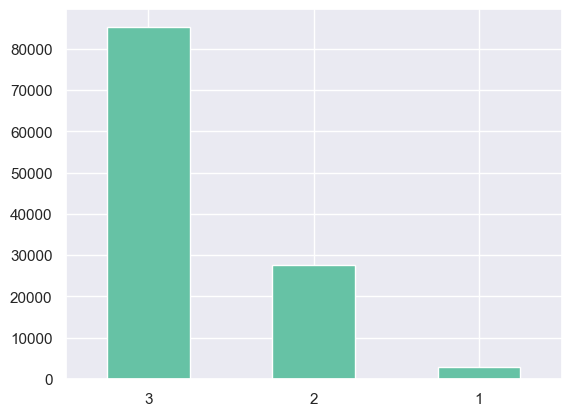

In [18]:
# Checking the value counts of target variable
merged_data['accident_severity'].value_counts().plot(kind="bar", rot=0)
merged_data["accident_severity"].value_counts()

Cell [645] counts and uses a bar chart to display the frequency of each class after analysing the 'accident_severity' distribution in merged_data. Class 1 is the least frequent, class 3 is the most common, and class 2 is the least common. This highlights potential modelling concerns related to class imbalance.

**Train-Test-Split**

In [19]:
#random split of dataset
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(merged_data, test_size=0.3, random_state=42)
print(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")

80958 train and 34697 test instances


Cell [646] uses a fixed random seed to ensure consistent splits by dividing the {merged_data} into two groups and allocating 80% to training and 20% to testing using the `train_test_split` function. 34,697 test samples and 80,958 training samples are the final sizes.

In [20]:
# Stratified splitting of dataset
merged_data["severity"] = pd.cut(merged_data["accident_severity"], bins=[0, 1, 2, 3],
                          labels=[1, 2, 3])

In [22]:
strat_train_set, strat_test_set = train_test_split(merged_data, test_size=0.3, random_state=42,
                                                  stratify=merged_data["severity"])

In [23]:
print(f"There are {strat_train_set.shape[0]} training and {strat_test_set.shape[0]} test instances")

There are 80958 training and 34697 test instances


Cell [647] uses `pd.cut} for categorization and `train_test_split} for proportionate class distribution to stratify the dataset by 'accident_severity' into train and test sets. Cell [649], with 80,958 training and 34,697 test instances, attests to the split's success.

In [24]:
# Comparison between Random split and Stratified split
def severity_cat(data):
    return data["severity"].value_counts() / len(data)

# create a random split
rand_train_set, rand_test_set = train_test_split(merged_data, test_size=0.2, random_state=42)

# create a temporary dataframe for easy visualization
df_tmp = pd.DataFrame({
    "Overall": severity_cat(merged_data),
    "Random test set": severity_cat(rand_test_set),
    "Stratified test set": severity_cat(strat_test_set),
}).sort_index()

# add two columns for the percent of the difference to the overall proportion
df_tmp["Rand. %error"] = 100 * df_tmp["Random test set"] / df_tmp["Overall"] - 100
df_tmp["Strat. %error"] = 100 * df_tmp["Stratified test set"] / df_tmp["Overall"] - 100

df_tmp

,Overall,Random test set,Stratified test set,Rand. %error,Strat. %error
1,0.023769,0.022956,0.023777,-3.419425,0.034935
2,0.238295,0.236522,0.238291,-0.743832,-0.001441
3,0.737936,0.740521,0.737931,0.350339,-0.000660


Cell [650] compares dataset splits that are stratified and random, and uses `severity_cat} to examine severity distributions. These are shown alongside error percentages in {df_tmp}, which demonstrates the effectiveness of the stratified split by showing how closely it aligns with the broader distribution because of its small error.

In [25]:
del strat_train_set["severity"]
del strat_test_set["severity"]

In [26]:
# Renaming the variables to shorter names:
trainset = strat_train_set
testset = strat_test_set

In [27]:
# Conversion of datatype of column 'vehicle_type'

trainset['vehicle_type'] = trainset['vehicle_type'].astype('object')

testset['vehicle_type'] = testset['vehicle_type'].astype('object')


After stratification, cells [651]–[653] remove the temporary "severity" column and rename the datasets as "trainset" and "testset" for ease of use. To further indicate its categorical character for further analysis and modelling, the'vehicle_type' column is additionally recast as 'object' in both sets.

**Univariate Analysis**

In [28]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80958 entries, 15887 to 131996
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   accident_index                    80958 non-null  object 
 1   vehicle_type                      80958 non-null  object 
 2   towing_and_articulation           80958 non-null  float64
 3   vehicle_manoeuvre                 80958 non-null  float64
 4   vehicle_location_restricted_lane  80958 non-null  float64
 5   junction_location                 80958 non-null  float64
 6   skidding_and_overturning          80958 non-null  float64
 7   first_point_of_impact             80958 non-null  float64
 8   vehicle_left_hand_drive           80958 non-null  int64  
 9   sex_of_driver                     80958 non-null  int64  
 10  age_band_of_driver                80958 non-null  float64
 11  engine_capacity_cc                80958 non-null  float64
 12 

Cell [654] does a univariate analysis on 'trainset' using {.info()}, which lists the data types and non-null counts for each column. It shows a dataset devoid of missing values with 32 columns, each with 80,958 non-null entries that include objects, floats, and integers.

In [29]:
# Distribution of categorial data
trainset['generic_make_model'].value_counts()

FORD FIESTA                3066
-1                         2547
VOLKSWAGEN GOLF            2366
VAUXHALL CORSA             2296
VAUXHALL ASTRA             2017
                           ... 
TOYOTA MR2                    1
BMW MODEL MISSING             1
SUBARU XV                     1
WRIGHTBUS MODEL MISSING       1
DUCATI HYPERMOTARD            1
Name: generic_make_model, Length: 675, dtype: int64

In [30]:
# Discarding -1 values from column 'generic_make_model' from trainset
trainset["generic_make_model"].replace("-1", float("nan"), inplace=True)

# drop rows with missing values
trainset.dropna (inplace=True)
# check if -1 has been removed
trainset['generic_make_model'].value_counts()

FORD FIESTA                3066
VOLKSWAGEN GOLF            2366
VAUXHALL CORSA             2296
VAUXHALL ASTRA             2017
FORD FOCUS                 1927
                           ... 
TOYOTA MR2                    1
BMW MODEL MISSING             1
SUBARU XV                     1
WRIGHTBUS MODEL MISSING       1
DUCATI HYPERMOTARD            1
Name: generic_make_model, Length: 674, dtype: int64

Cells [655] and [656] detect '-1' as missing data placeholders, replace them with NaN, and then eliminate rows with NaN values in order to tidy up the 'trainset' DataFrame's 'generic_make_model' column. After all '-1' entries are eliminated, 'FORD FIESTA' remains the most prevalent value.

In [31]:
# Discarding -1 values from column 'generic_make_model' from testset
testset["generic_make_model"].replace("-1", float("nan"), inplace=True)

# drop rows with missing values
testset.dropna (inplace=True)
# check if -1 has been removed
testset['generic_make_model'].value_counts()



FORD FIESTA                 1289
VAUXHALL CORSA               999
VOLKSWAGEN GOLF              997
FORD FOCUS                   889
VAUXHALL ASTRA               841
                            ... 
VOLKSWAGEN LUPO                1
JOHN DEERE MODEL MISSING       1
MERCEDES CL CLASS              1
LAMBRETTA MODEL MISSING        1
CHRYSLER PT CRUISER            1
Name: generic_make_model, Length: 660, dtype: int64

The code eliminates rows with NaNs and substitutes '-1' items in the 'generic_make_model' of the testset with NaNs. The output confirms that '-1' values are eliminated, making the data ready for analysis and displaying 'FORD FIESTA' as the most popular model.

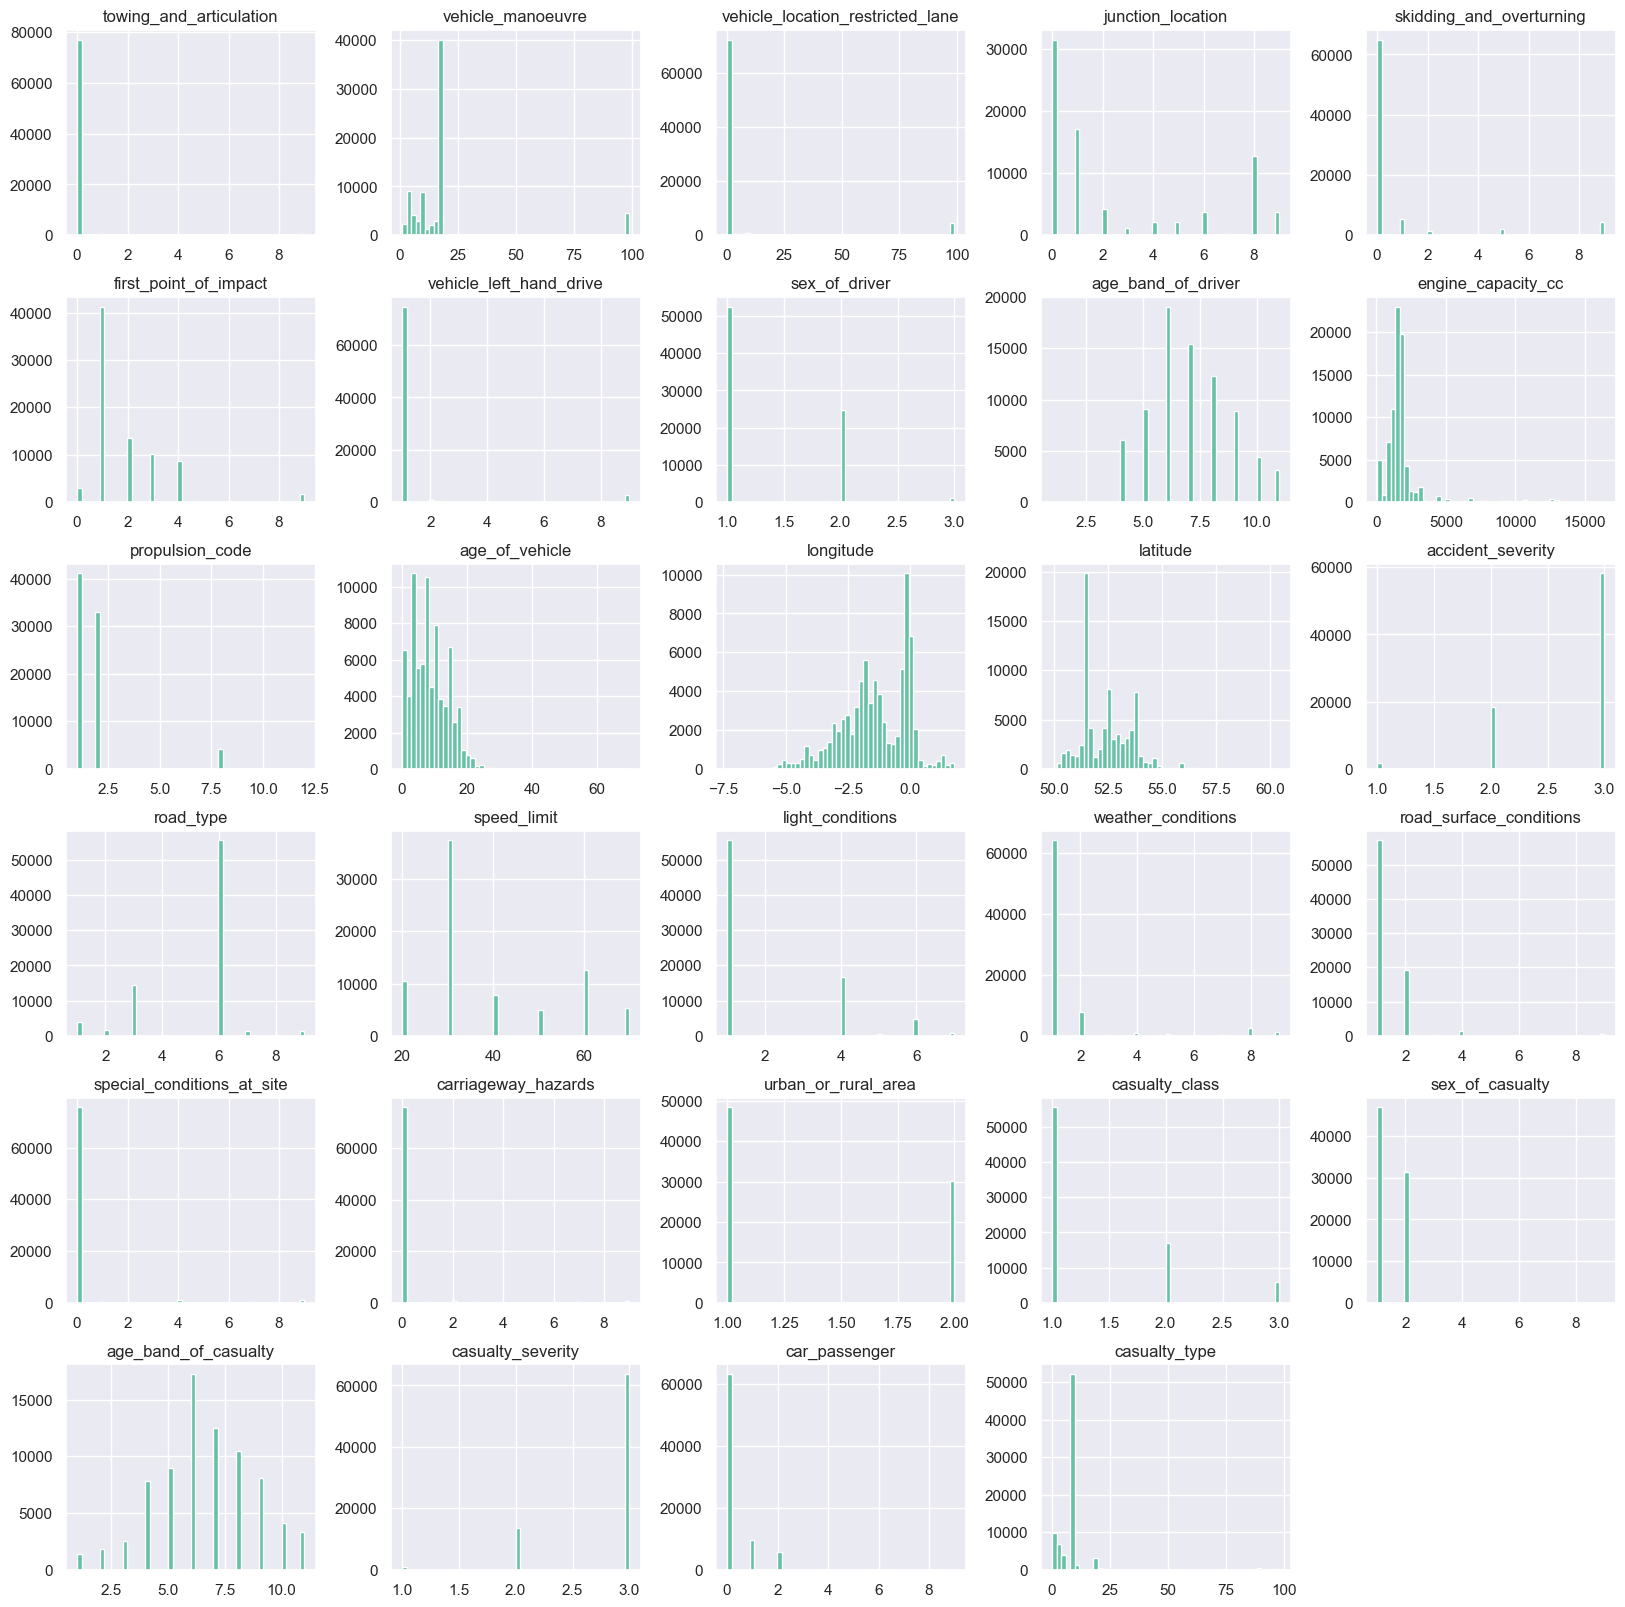

In [32]:
# Distribution of Numerical data

dummy = trainset.hist(bins=50, figsize=(20,20))


In order to comprehend feature properties prior to modelling, histograms for each numerical attribute in the "trainset" using 50 bins provide insight into value frequency, trends, outliers, and distributions.

**Bivariate Analysis**

In [33]:
# Correlation between the variables

corr_matrix = trainset.corr(method="pearson", numeric_only=True)
corr_matrix.style.background_gradient(cmap='coolwarm', axis=None).format(precision=3)


,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,first_point_of_impact,vehicle_left_hand_drive,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,longitude,latitude,accident_severity,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type
towing_and_articulation,1.000,0.195,0.194,0.066,0.203,0.188,0.185,-0.002,0.006,0.097,0.009,-0.032,0.059,-0.052,0.020,0.047,-0.024,0.004,0.121,0.219,0.229,0.242,-0.024,-0.012,-0.013,0.012,0.014,0.011,-0.006
vehicle_manoeuvre,0.195,1.000,0.920,0.336,0.856,0.356,0.708,0.061,-0.065,-0.100,-0.008,-0.078,0.218,-0.170,0.090,0.076,-0.166,0.017,0.139,0.164,0.338,0.320,-0.140,-0.105,-0.070,-0.032,0.072,-0.058,-0.064
vehicle_location_restricted_lane,0.194,0.920,1.000,0.361,0.898,0.384,0.727,0.072,-0.051,-0.096,0.002,-0.091,0.235,-0.189,0.121,0.069,-0.210,-0.006,0.135,0.146,0.342,0.324,-0.182,-0.108,-0.067,-0.023,0.095,-0.068,-0.072
junction_location,0.066,0.336,0.361,1.000,0.306,0.188,0.273,0.051,-0.019,-0.080,0.007,-0.036,0.116,-0.091,0.102,-0.002,-0.253,-0.029,0.037,0.041,0.116,0.105,-0.211,-0.075,-0.013,-0.006,0.076,-0.028,-0.037
skidding_and_overturning,0.203,0.856,0.898,0.306,1.000,0.358,0.677,0.052,-0.078,-0.099,-0.021,-0.068,0.201,-0.174,0.091,0.063,-0.139,0.031,0.131,0.157,0.323,0.302,-0.115,-0.122,-0.076,-0.031,0.069,-0.059,-0.060
first_point_of_impact,0.188,0.356,0.384,0.188,0.358,1.000,0.300,0.042,-0.008,-0.050,0.007,-0.051,0.089,-0.072,0.087,0.006,-0.093,-0.021,0.080,0.106,0.179,0.163,-0.088,-0.059,-0.041,-0.019,0.065,-0.026,-0.039
vehicle_left_hand_drive,0.185,0.708,0.727,0.273,0.677,0.300,1.000,0.136,-0.009,-0.010,0.053,-0.023,0.187,-0.149,0.095,0.031,-0.152,-0.003,0.115,0.094,0.209,0.184,-0.140,-0.079,-0.019,-0.003,0.075,-0.033,-0.021
sex_of_driver,-0.002,0.061,0.072,0.051,0.052,0.042,0.136,1.000,0.010,-0.108,-0.070,0.001,-0.021,0.003,0.065,0.025,-0.033,-0.063,0.014,0.003,-0.001,0.000,-0.016,-0.017,0.328,-0.013,0.057,-0.002,-0.001
age_band_of_driver,0.006,-0.065,-0.051,-0.019,-0.078,-0.008,-0.009,0.010,1.000,0.114,0.092,-0.020,-0.041,0.013,-0.032,0.012,0.040,-0.146,-0.025,-0.028,-0.023,-0.027,0.063,0.026,0.049,0.390,-0.033,-0.038,0.010
engine_capacity_cc,0.097,-0.100,-0.096,-0.080,-0.099,-0.050,-0.010,-0.108,0.114,1.000,0.117,-0.020,-0.016,0.037,-0.049,-0.061,0.129,-0.015,-0.016,-0.024,-0.047,-0.045,0.089,0.064,0.013,0.060,-0.036,0.007,0.109


The trainset's correlation matrix is displayed in cell [659] using Pearson's approach. This demonstrates correlations between the variables, particularly strong ones between "vehicle_manoeuvre" and "vehicle_location_restricted_lane," as well as "skidding_and_overturning." This draws attention to any underlying relationships or overlaps between characteristics.

array([[<Axes: xlabel='accident_severity', ylabel='accident_severity'>,
        <Axes: xlabel='casualty_severity', ylabel='accident_severity'>,
        <Axes: xlabel='vehicle_manoeuvre', ylabel='accident_severity'>,
        <Axes: xlabel='skidding_and_overturning', ylabel='accident_severity'>,
        <Axes: xlabel='vehicle_location_restricted_lane', ylabel='accident_severity'>,
        <Axes: xlabel='vehicle_left_hand_drive', ylabel='accident_severity'>,
        <Axes: xlabel='urban_or_rural_area', ylabel='accident_severity'>,
        <Axes: xlabel='speed_limit', ylabel='accident_severity'>,
        <Axes: xlabel='carriageway_hazards', ylabel='accident_severity'>,
        <Axes: xlabel='special_conditions_at_site', ylabel='accident_severity'>],
       [<Axes: xlabel='accident_severity', ylabel='casualty_severity'>,
        <Axes: xlabel='casualty_severity', ylabel='casualty_severity'>,
        <Axes: xlabel='vehicle_manoeuvre', ylabel='casualty_severity'>,
        <Axes: xlabel='skidd

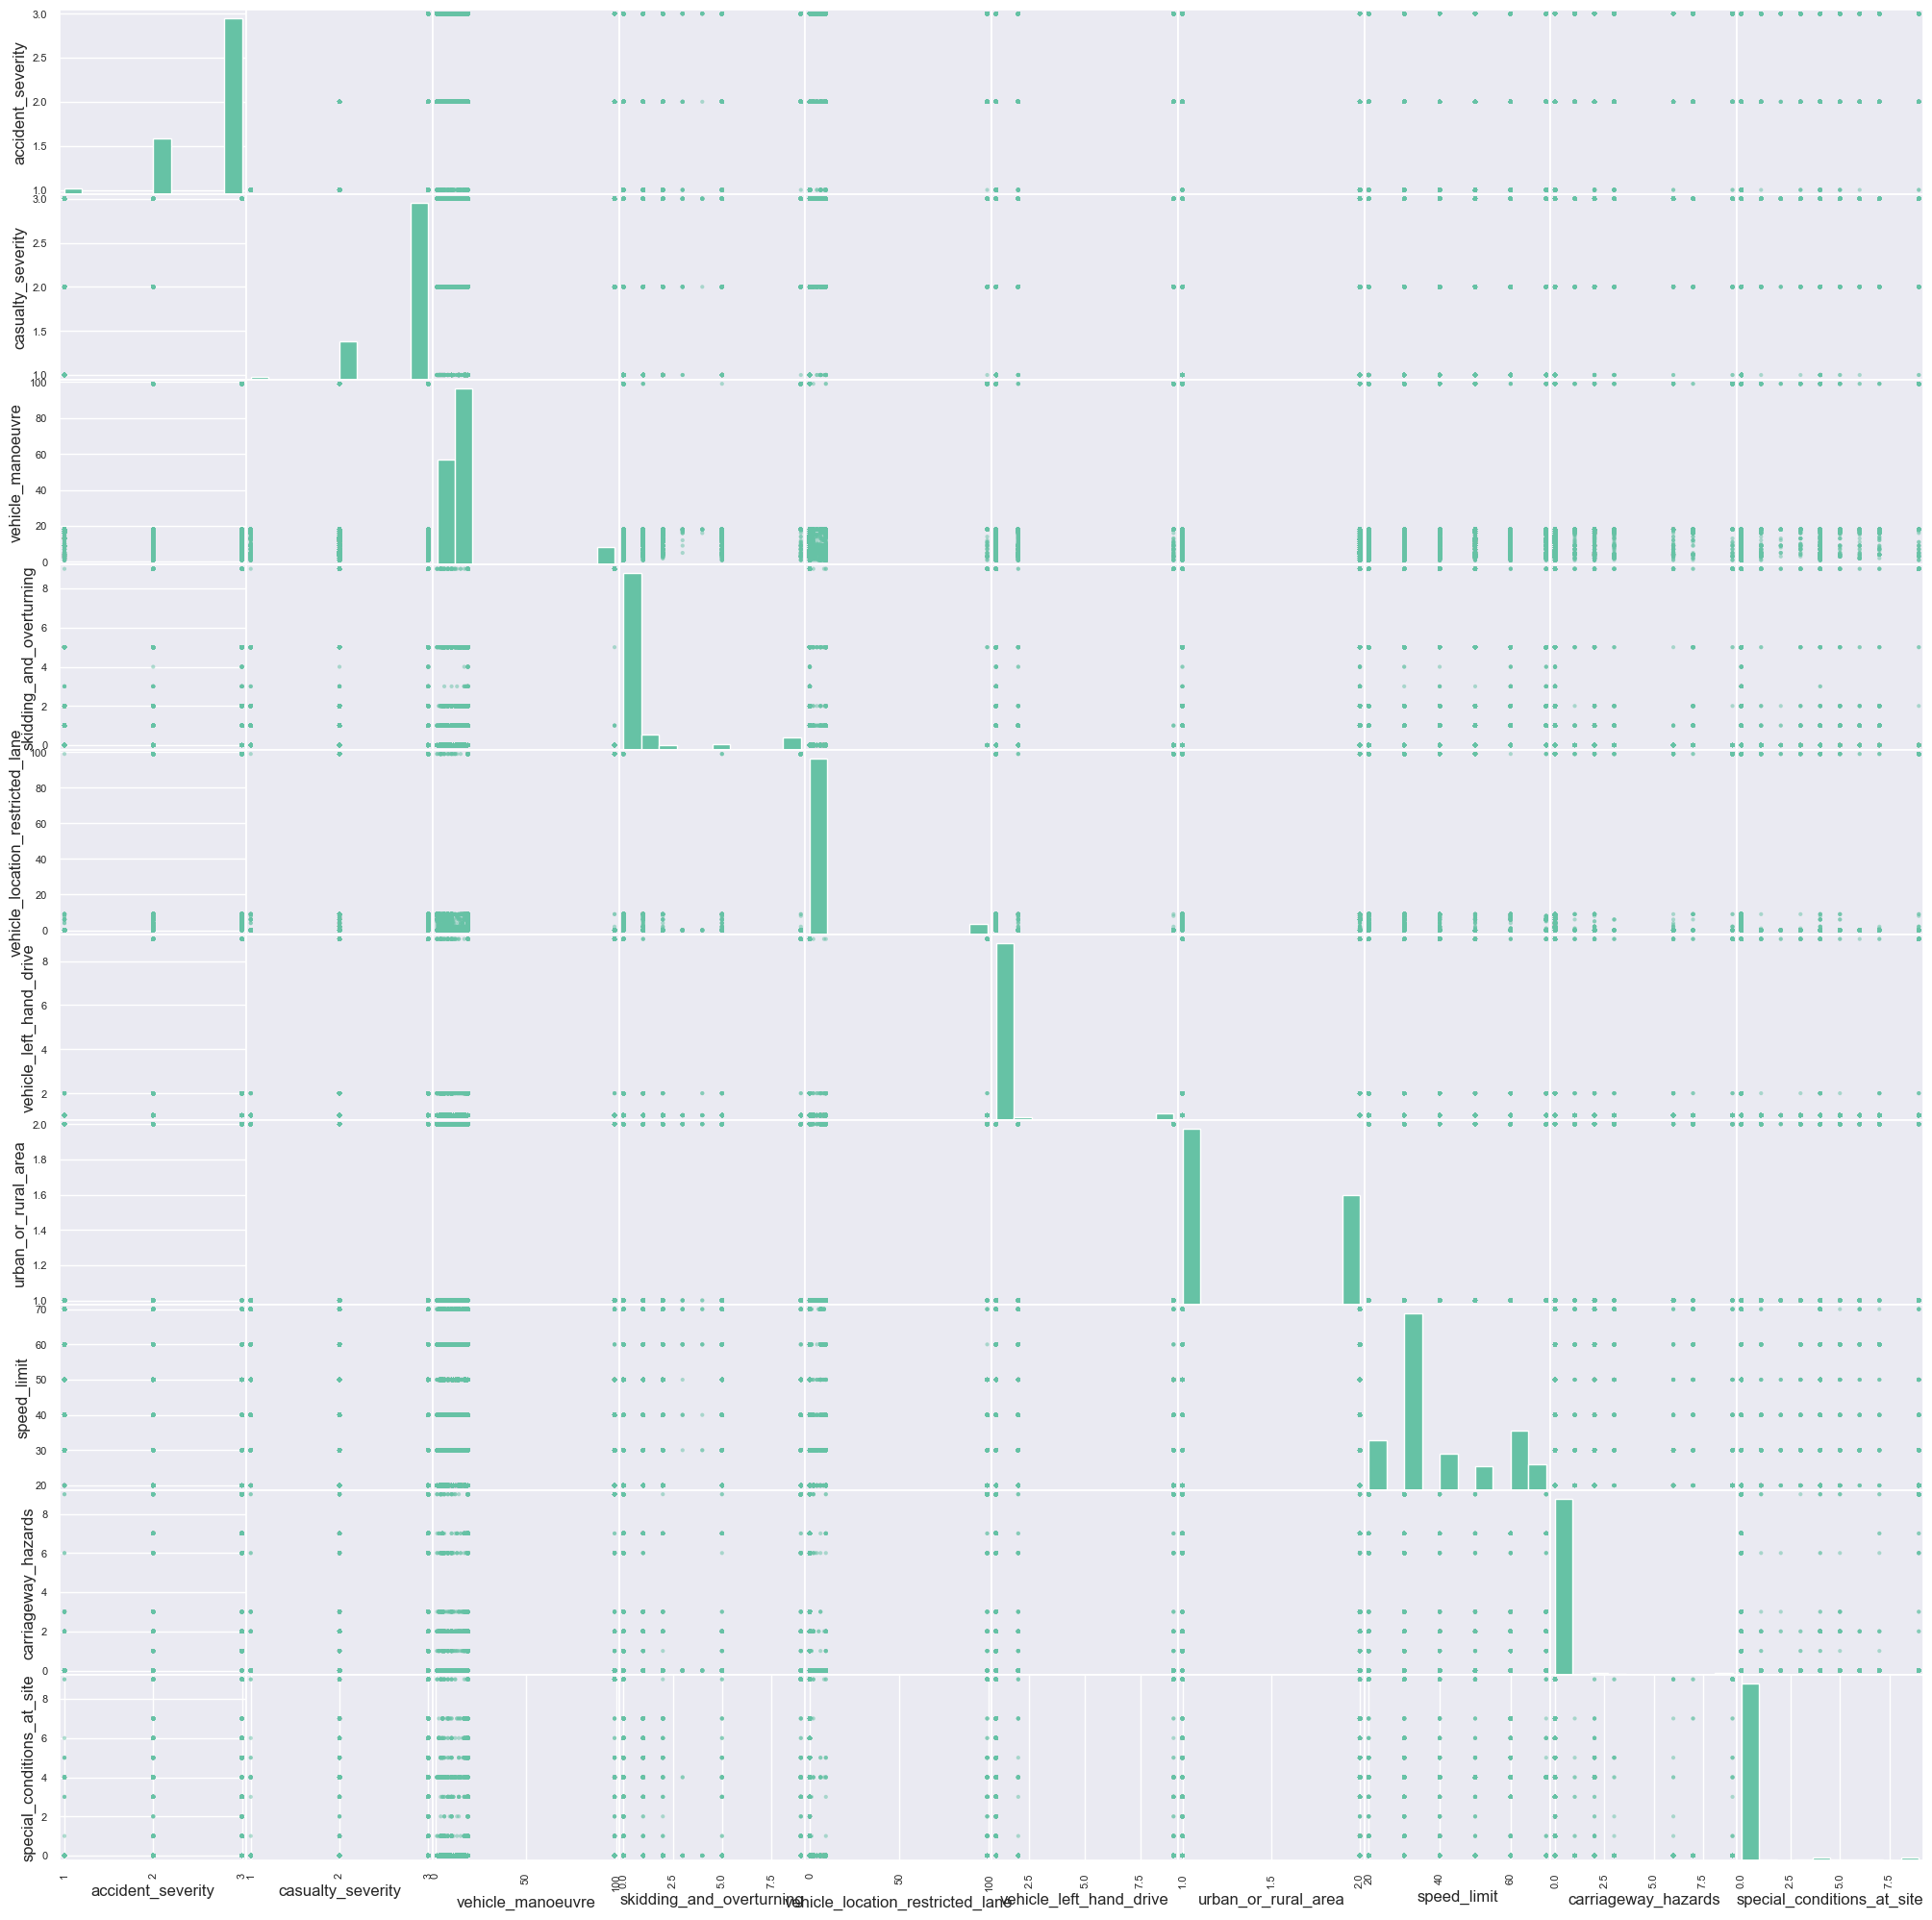

In [34]:
# Scatter matrix plot for highly relate variables
from pandas.plotting import scatter_matrix

# select only the variables that are most likely to be correlated
sel_vars = ["accident_severity", 'casualty_severity', "vehicle_manoeuvre", "skidding_and_overturning", "vehicle_location_restricted_lane" ,'vehicle_left_hand_drive', 'urban_or_rural_area', 'speed_limit', 'carriageway_hazards','special_conditions_at_site' ]
scatter_matrix(trainset[sel_vars], figsize=(25, 25))


In order to investigate the links between variables such as "accident severity" and "casualty severity," Cell [660] creates a scatter matrix plot. This plot includes scatter plots for variable pairs and histograms for individual distributions, which help identify trends and linkages between these parameters.

In [35]:
# Correlation of variables with target
corr_matrix['accident_severity'].sort_values(ascending=False)

accident_severity                   1.000000
casualty_severity                   0.815886
vehicle_location_restricted_lane    0.121192
junction_location                   0.101711
vehicle_left_hand_drive             0.095189
skidding_and_overturning            0.090893
vehicle_manoeuvre                   0.089816
first_point_of_impact               0.087490
longitude                           0.084180
sex_of_driver                       0.064923
sex_of_casualty                     0.059342
special_conditions_at_site          0.044701
carriageway_hazards                 0.043755
weather_conditions                  0.031468
propulsion_code                     0.021445
towing_and_articulation             0.020293
road_surface_conditions             0.007510
casualty_type                       0.000446
car_passenger                      -0.026285
age_of_vehicle                     -0.030193
age_band_of_driver                 -0.031717
road_type                          -0.041802
engine_cap

Sorted correlation coefficients between 'accident_severity' and other features in 'trainset' are shown in cell [661]. While "casualty severity" exhibits a high positive association that directs feature selection for predictive modelling, "speed limit," "urban or rural area," and "latitude" show negative correlations.

### Dummy Variables

In [36]:
# creation of new dummy variable
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop="first", sparse=False)

# categorical columns to transform
cat_cols = ["vehicle_type"]

# fit an encoder and transform the trainset
cat_vals = trainset[cat_cols]
cat_vals

transformed = one_hot_encoder.fit_transform(cat_vals)
transformed

# the names of the new columns
new_col_names = one_hot_encoder.get_feature_names_out(cat_cols)
new_col_names

# put the transformed data as columns in the trainset dataframe
for i, new_col_name in enumerate(new_col_names):
    trainset[new_col_name] = transformed[:,i]

# check if the dummies are produced correctly in the trainset
trainset.head()


C:\Users\sanni\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,accident_index,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,first_point_of_impact,vehicle_left_hand_drive,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,longitude,latitude,accident_severity,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,vehicle_type_3.0,vehicle_type_4.0,vehicle_type_5.0,vehicle_type_8.0,vehicle_type_9.0,vehicle_type_10.0,vehicle_type_11.0,vehicle_type_17.0,vehicle_type_19.0,vehicle_type_20.0,vehicle_type_21.0,vehicle_type_90.0
15887,2022010374283,9.0,0.0,13.0,0.0,0.0,0.0,1.0,1,1,10.0,2993.0,2.0,12.0,JAGUAR XF SERIES,0.141606,51.586289,3,3,30,4,1,1.0,0.0,0.0,2,2,1.0,9.0,3,1.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109009,2022302200611,9.0,0.0,9.0,0.0,6.0,0.0,1.0,1,2,7.0,1968.0,2.0,10.0,AUDI A6,-1.578849,53.014745,3,6,50,1,1,1.0,0.0,0.0,2,2,1.0,3.0,3,2.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51029,2022031166596,9.0,0.0,4.0,0.0,2.0,0.0,2.0,2,2,11.0,875.0,1.0,7.0,FIAT PANDA,-2.831197,54.197990,3,6,30,1,1,1.0,0.0,0.0,2,1,1.0,8.0,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46066,2022010412717,11.0,0.0,5.0,0.0,2.0,0.0,0.0,1,2,7.0,5132.0,2.0,6.0,VOLVO MODEL MISSING,-0.115473,51.462052,2,6,20,1,1,1.0,0.0,0.0,1,2,2.0,9.0,2,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
111808,2022302201832,9.0,0.0,1.0,9.0,6.0,0.0,2.0,1,2,9.0,1198.0,1.0,6.0,NISSAN PULSAR,-1.291316,52.922928,3,6,30,4,1,1.0,0.0,0.0,1,1,2.0,9.0,3,0.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cell [662] applies scikit-learn's OneHotEncoder to convert 'trainset's'vehicle_type' into binary columns, a standard preprocessing step for categorical data. Dummy variable creation is verified as successful, and the altered data is incorporated into the "trainset" with the encoder's new column names.

In [37]:
drop_list = ['vehicle_type_3.0','vehicle_type_4.0','vehicle_type_5.0','vehicle_type_8.0','vehicle_type_10.0','vehicle_type_11.0','vehicle_type_17.0','vehicle_type_19.0','vehicle_type_20.0','vehicle_type_21.0','vehicle_type_90.0']
for i in drop_list:
  cat_cols.append(i)

In [38]:
# delete the original categorical columns
trainset = trainset.drop(cat_cols, axis=1)


In [39]:
# check if dummy variable is visible in train set
trainset.head()

,accident_index,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,first_point_of_impact,vehicle_left_hand_drive,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,longitude,latitude,accident_severity,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,vehicle_type_9.0
15887,2022010374283,0.0,13.0,0.0,0.0,0.0,1.0,1,1,10.0,2993.0,2.0,12.0,JAGUAR XF SERIES,0.141606,51.586289,3,3,30,4,1,1.0,0.0,0.0,2,2,1.0,9.0,3,1.0,9.0,1.0
109009,2022302200611,0.0,9.0,0.0,6.0,0.0,1.0,1,2,7.0,1968.0,2.0,10.0,AUDI A6,-1.578849,53.014745,3,6,50,1,1,1.0,0.0,0.0,2,2,1.0,3.0,3,2.0,9.0,1.0
51029,2022031166596,0.0,4.0,0.0,2.0,0.0,2.0,2,2,11.0,875.0,1.0,7.0,FIAT PANDA,-2.831197,54.197990,3,6,30,1,1,1.0,0.0,0.0,2,1,1.0,8.0,3,0.0,1.0,1.0
46066,2022010412717,0.0,5.0,0.0,2.0,0.0,0.0,1,2,7.0,5132.0,2.0,6.0,VOLVO MODEL MISSING,-0.115473,51.462052,2,6,20,1,1,1.0,0.0,0.0,1,2,2.0,9.0,2,0.0,11.0,0.0
111808,2022302201832,0.0,1.0,9.0,6.0,0.0,2.0,1,2,9.0,1198.0,1.0,6.0,NISSAN PULSAR,-1.291316,52.922928,3,6,30,4,1,1.0,0.0,0.0,1,1,2.0,9.0,3,0.0,9.0,1.0


To avoid repetition, cells [663] and [664] designate'vehicle_type' for removal from 'trainset' when dummy variables are created. Cell [665] validates these modifications by showcasing the initial rows of the dataset, which indicate the removal of the initial'vehicle_type' and the addition of fresh dummy variables.

In [40]:
# transform the testset using One hot encoder fitted on trainset
cat_cols = ["vehicle_type"]
cat_vals = testset[cat_cols]
transformed = one_hot_encoder.transform(cat_vals)

new_col_names = one_hot_encoder.get_feature_names_out(cat_cols)


# put the transformed data as columns in the testset dataframe
for i, new_col_name in enumerate(new_col_names):
    testset[new_col_name] = transformed[:,i]

# check if the dummies are produced correctly in the testset
testset.head()




,accident_index,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,first_point_of_impact,vehicle_left_hand_drive,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,longitude,latitude,accident_severity,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,vehicle_type_3.0,vehicle_type_4.0,vehicle_type_5.0,vehicle_type_8.0,vehicle_type_9.0,vehicle_type_10.0,vehicle_type_11.0,vehicle_type_17.0,vehicle_type_19.0,vehicle_type_20.0,vehicle_type_21.0,vehicle_type_90.0
10248,2022010366741,9.0,0.0,18.0,0.0,8.0,0.0,3.0,1,1,6.0,1598.0,1.0,11.0,RENAULT MEGANE,-0.197551,51.382544,2,6,20,4,1,1.0,0.0,0.0,1,1,1.0,6.0,2,0.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12855,2022010370193,9.0,0.0,11.0,0.0,0.0,0.0,4.0,1,1,6.0,1997.0,1.0,7.0,BMW 2 SERIES,-0.141106,51.549293,3,6,20,1,1,1.0,0.0,0.0,1,1,1.0,8.0,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21909,2022010381934,9.0,0.0,18.0,0.0,1.0,0.0,1.0,1,1,4.0,1984.0,1.0,6.0,VOLKSWAGEN GOLF,0.032151,51.486501,3,6,30,5,1,1.0,0.0,0.0,1,2,1.0,4.0,3,2.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159154,202260B074135,9.0,0.0,16.0,0.0,3.0,0.0,4.0,1,1,9.0,1997.0,2.0,20.0,PEUGEOT 206,-3.564902,53.284729,3,1,30,1,1,1.0,0.0,0.0,2,3,1.0,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87166,2022201150950,9.0,0.0,18.0,0.0,6.0,0.0,3.0,1,1,8.0,1560.0,2.0,11.0,PEUGEOT 308,-1.536299,52.406560,3,6,30,4,1,1.0,0.0,0.0,1,1,2.0,7.0,3,0.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To guarantee consistency in categorical representation, Cell [666] applies the same one-hot encoding to'vehicle_type' in both the test and train sets. By include the dummy variables in the test set and presenting its initial rows, the success of the transformation is confirmed.

In [41]:
# delete the original categorical columns
drop_list = ['vehicle_type_3.0','vehicle_type_4.0','vehicle_type_5.0','vehicle_type_8.0','vehicle_type_10.0','vehicle_type_11.0','vehicle_type_17.0','vehicle_type_19.0','vehicle_type_20.0','vehicle_type_21.0','vehicle_type_90.0']
for i in drop_list:
  cat_cols.append(i)

testset = testset.drop(cat_cols, axis=1)

Cell [667] removes the original'vehicle_type' and other specified columns in `drop_list} and replaces them with new dummy variables, completing the one-hot encoding of the test set. In order to accurately evaluate the model, this step guarantees that the test set is prepared with numerical inputs.

In [42]:
# check if dummy variable is visible in test set
testset.head()

,accident_index,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,first_point_of_impact,vehicle_left_hand_drive,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,longitude,latitude,accident_severity,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,vehicle_type_9.0
10248,2022010366741,0.0,18.0,0.0,8.0,0.0,3.0,1,1,6.0,1598.0,1.0,11.0,RENAULT MEGANE,-0.197551,51.382544,2,6,20,4,1,1.0,0.0,0.0,1,1,1.0,6.0,2,0.0,9.0,1.0
12855,2022010370193,0.0,11.0,0.0,0.0,0.0,4.0,1,1,6.0,1997.0,1.0,7.0,BMW 2 SERIES,-0.141106,51.549293,3,6,20,1,1,1.0,0.0,0.0,1,1,1.0,8.0,3,0.0,1.0,1.0
21909,2022010381934,0.0,18.0,0.0,1.0,0.0,1.0,1,1,4.0,1984.0,1.0,6.0,VOLKSWAGEN GOLF,0.032151,51.486501,3,6,30,5,1,1.0,0.0,0.0,1,2,1.0,4.0,3,2.0,9.0,1.0
159154,202260B074135,0.0,16.0,0.0,3.0,0.0,4.0,1,1,9.0,1997.0,2.0,20.0,PEUGEOT 206,-3.564902,53.284729,3,1,30,1,1,1.0,0.0,0.0,2,3,1.0,3.0,3,0.0,0.0,1.0
87166,2022201150950,0.0,18.0,0.0,6.0,0.0,3.0,1,1,8.0,1560.0,2.0,11.0,PEUGEOT 308,-1.536299,52.406560,3,6,30,4,1,1.0,0.0,0.0,1,1,2.0,7.0,3,0.0,9.0,1.0


In [43]:
# Use label encoding

from sklearn.preprocessing import LabelEncoder
trainset["accident_index"] = trainset["accident_index"].astype(str)
for column in ["accident_index","generic_make_model"]:
 trainset[column] = LabelEncoder().fit_transform(trainset[column])

 from sklearn.preprocessing import LabelEncoder
testset["accident_index"] = testset["accident_index"].astype(str)
for column in ["accident_index","generic_make_model"]:
 testset[column] = LabelEncoder().fit_transform(testset[column])



Cell [669] converts texts to numerical values in order to satisfy the numeric input requirement of many machine learning methods. It does this by using scikit-learn's `LabelEncoder` to numerically encode 'accident_index' and 'generic_make_model' in both train and test sets.

In [44]:
trainset.shape

(78411, 32)

In [45]:
testset.shape

(33603, 32)

In [46]:
# dropping rows with 0 or unknown values
trainset = trainset[trainset['vehicle_manoeuvre'] != 99.0]
trainset = trainset[trainset['sex_of_driver'] != 3]
trainset = trainset[trainset['skidding_and_overturning'] != 9.0]
trainset = trainset[trainset['junction_location'] != 9.0]
trainset = trainset[trainset['road_surface_conditions'] != 9.0]
trainset = trainset[trainset['special_conditions_at_site'] != 9.0]
trainset = trainset[trainset['carriageway_hazards'] != 9.0]

In [47]:
trainset.shape

(73261, 32)

In [48]:
trainset.head()

,accident_index,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,first_point_of_impact,vehicle_left_hand_drive,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,longitude,latitude,accident_severity,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,vehicle_type_9.0
15887,4414,0.0,13.0,0.0,0.0,0.0,1.0,1,1,10.0,2993.0,2.0,12.0,235,0.141606,51.586289,3,3,30,4,1,1.0,0.0,0.0,2,2,1.0,9.0,3,1.0,9.0,1.0
109009,28697,0.0,9.0,0.0,6.0,0.0,1.0,1,2,7.0,1968.0,2.0,10.0,18,-1.578849,53.014745,3,6,50,1,1,1.0,0.0,0.0,2,2,1.0,3.0,3,2.0,9.0,1.0
51029,13744,0.0,4.0,0.0,2.0,0.0,2.0,2,2,11.0,875.0,1.0,7.0,126,-2.831197,54.197990,3,6,30,1,1,1.0,0.0,0.0,2,1,1.0,8.0,3,0.0,1.0,1.0
46066,12408,0.0,5.0,0.0,2.0,0.0,0.0,1,2,7.0,5132.0,2.0,6.0,630,-0.115473,51.462052,2,6,20,1,1,1.0,0.0,0.0,1,2,2.0,9.0,2,0.0,11.0,0.0
111808,29386,0.0,1.0,9.0,6.0,0.0,2.0,1,2,9.0,1198.0,1.0,6.0,408,-1.291316,52.922928,3,6,30,4,1,1.0,0.0,0.0,1,1,2.0,9.0,3,0.0,9.0,1.0


In [49]:
trainset.shape

(73261, 32)

In [50]:
testset = testset[testset['vehicle_manoeuvre'] != 99]
testset = testset[testset['sex_of_driver'] != 3]
testset = testset[testset['skidding_and_overturning'] != 9.0]
testset = testset[testset['junction_location'] != 9.0]
testset = testset[testset['road_surface_conditions'] != 9.0]
testset = testset[testset['special_conditions_at_site'] != 9.0]
testset = testset[testset['carriageway_hazards'] != 9.0]

In [51]:
testset.head()

,accident_index,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,first_point_of_impact,vehicle_left_hand_drive,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,longitude,latitude,accident_severity,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,vehicle_type_9.0
10248,1546,0.0,18.0,0.0,8.0,0.0,3.0,1,1,6.0,1598.0,1.0,11.0,452,-0.197551,51.382544,2,6,20,4,1,1.0,0.0,0.0,1,1,1.0,6.0,2,0.0,9.0,1.0
12855,1938,0.0,11.0,0.0,0.0,0.0,4.0,1,1,6.0,1997.0,1.0,7.0,44,-0.141106,51.549293,3,6,20,1,1,1.0,0.0,0.0,1,1,1.0,8.0,3,0.0,1.0,1.0
21909,3204,0.0,18.0,0.0,1.0,0.0,1.0,1,1,4.0,1984.0,1.0,6.0,598,0.032151,51.486501,3,6,30,5,1,1.0,0.0,0.0,1,2,1.0,4.0,3,2.0,9.0,1.0
159154,23388,0.0,16.0,0.0,3.0,0.0,4.0,1,1,9.0,1997.0,2.0,20.0,406,-3.564902,53.284729,3,1,30,1,1,1.0,0.0,0.0,2,3,1.0,3.0,3,0.0,0.0,1.0
87166,12622,0.0,18.0,0.0,6.0,0.0,3.0,1,1,8.0,1560.0,2.0,11.0,412,-1.536299,52.406560,3,6,30,4,1,1.0,0.0,0.0,1,1,2.0,7.0,3,0.0,9.0,1.0


# DATA CLEANING AND PRE-PROCESSING

**Missing Values**

In [ ]:
# check if any of the columns have missing values
trainset.isnull().sum()

Cell [678] counts NaNs in each column while employing {.isnull().sum()} to search for missing values in the 'trainset'. The dataset displays zeros in every column, meaning there are no missing values. This means the "trainset" is fully populated and prepared for additional research or modelling.

In [52]:
testset.isnull().sum()

accident_index                      0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
first_point_of_impact               0
vehicle_left_hand_drive             0
sex_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
longitude                           0
latitude                            0
accident_severity                   0
road_type                           0
speed_limit                         0
light_conditions                    0
weather_conditions                  0
road_surface_conditions             0
special_conditions_at_site          0
carriageway_hazards                 0
urban_or_rural_area                 0
casualty_class                      0
sex_of_casua

In [53]:
trainset.shape

(73261, 32)

In [54]:
testset.shape

(31383, 32)

<Axes: xlabel='longitude', ylabel='latitude'>

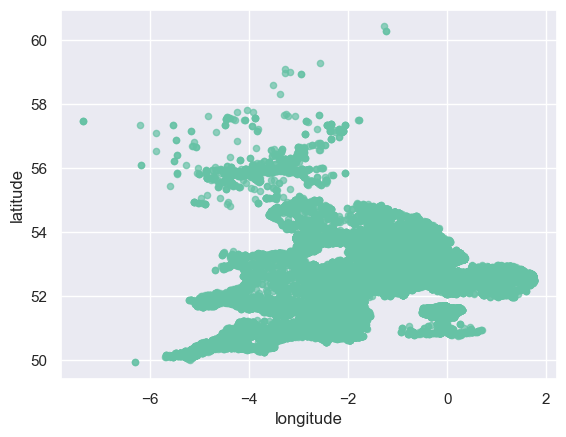

In [55]:
# Plotting the longitude and latitude data
trainset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.7)

Using latitude and longitude coordinates, this scatter plot from cell [682] shows the geographic distribution of the data points from the 'trainset'. By making the markers partially translucent when points overlap, the alpha value, set to 0.7, aids in comprehending the density of the points.

In [56]:
# Columns to be dropped
col=['longitude','latitude','accident_index','age_band_of_casualty','junction_location']
trainset = trainset.drop(columns=col)
testset = testset.drop(columns=col)


Cell [683] eliminates from both training and testing datasets columns such as "longitude," "latitude," "accident_index," "age_band_of_casualty," and "junction_location" that are considered unnecessary or unsuitable for modelling. The `drop` function is used to carry out this cleansing, which simplifies the data in preparation for the upcoming analysis.

In [57]:
# separate the target and predictors
ytrain = trainset["accident_severity"].copy()
Xtrain = trainset.drop("accident_severity", axis=1)
ytest = testset["accident_severity"].copy()
Xtest = testset.drop("accident_severity", axis=1)

In [58]:
# check the size of the Xtrain and Xtest datasets
Xtrain.shape, Xtest.shape

((73261, 26), (31383, 26))

**Outlier Detection**

In [59]:
# on trainset
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=100, random_state=42, contamination=0.05).fit(Xtrain)
yhat = clf.predict(Xtrain)
Xtrain = Xtrain[yhat != -1]
ytrain = ytrain[yhat != -1]
Xtrain.shape

(69598, 26)

Cell [686] classifies data points as either inliers (1) or outliers (-1) using a `IsolationForest} model on 'Xtrain' in order to find outliers. Even after removing outliers, 'Xtrain' keeps 69,598 observations; this is in spite of a warning regarding possibly incorrect feature names, which has no bearing on outlier detection.



In [60]:
# on testset
yhat = clf.predict(Xtest)
Xtest = Xtest[yhat != -1]
ytest = ytest[yhat != -1]
Xtest.shape

(29856, 26)

**Important Feature Selection**

                             Feature  Importance
22                 casualty_severity    0.589878
11                generic_make_model    0.063951
8                 engine_capacity_cc    0.057183
10                    age_of_vehicle    0.052944
7                 age_band_of_driver    0.035141
1                  vehicle_manoeuvre    0.026931
13                       speed_limit    0.021457
24                     casualty_type    0.016766
4              first_point_of_impact    0.016605
14                  light_conditions    0.012496
9                    propulsion_code    0.012093
16           road_surface_conditions    0.011601
15                weather_conditions    0.010801
12                         road_type    0.010368
3           skidding_and_overturning    0.009368
6                      sex_of_driver    0.008566
19               urban_or_rural_area    0.008401
21                   sex_of_casualty    0.007917
23                     car_passenger    0.006902
20                  

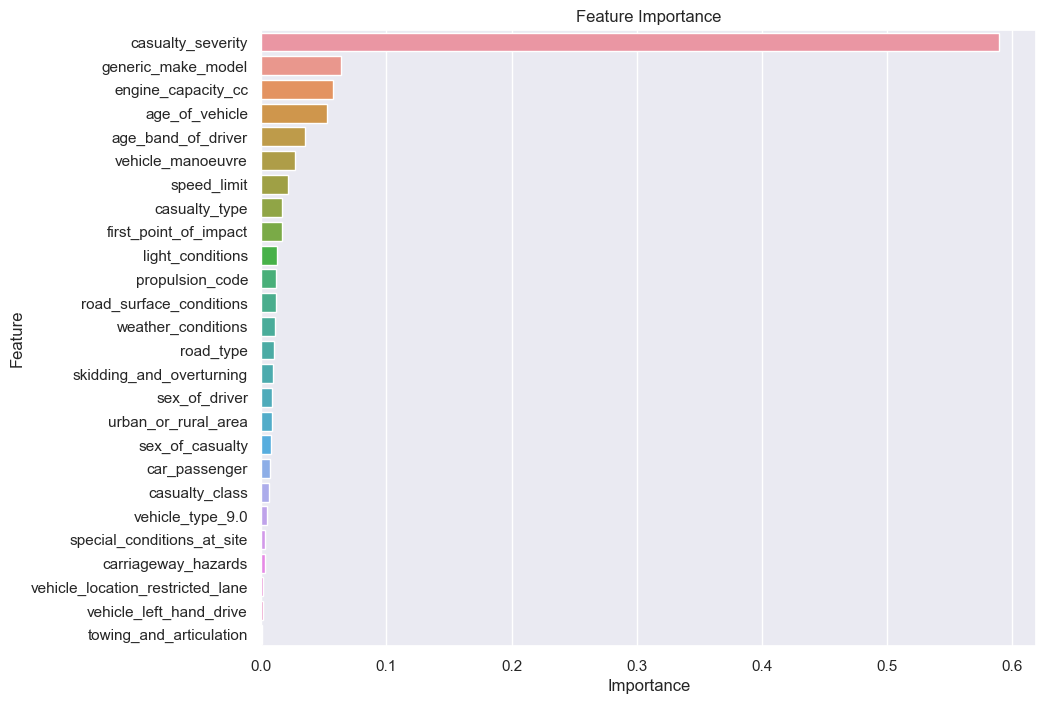

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data
rf.fit(Xtrain, ytrain)
# Get feature importances
importances = rf.feature_importances_

# Assuming you have a list of feature names
feature_names = Xtrain.columns.tolist()

# Create a DataFrame to view the feature names and their importance scores
import pandas as pd
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame to see the most important features at the top
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importances)
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Cell [688] pairs feature names with their scores and sorts them in order to ascertain the significance of each feature in 'Xtrain' using a RandomForestClassifier. The significance of 'casualty_severity' and 'generic_make_model' as significant predictors of the objective variable are illustrated in a bar plot.

In [62]:
print(feature_importances)

                             Feature  Importance
22                 casualty_severity    0.589878
11                generic_make_model    0.063951
8                 engine_capacity_cc    0.057183
10                    age_of_vehicle    0.052944
7                 age_band_of_driver    0.035141
1                  vehicle_manoeuvre    0.026931
13                       speed_limit    0.021457
24                     casualty_type    0.016766
4              first_point_of_impact    0.016605
14                  light_conditions    0.012496
9                    propulsion_code    0.012093
16           road_surface_conditions    0.011601
15                weather_conditions    0.010801
12                         road_type    0.010368
3           skidding_and_overturning    0.009368
6                      sex_of_driver    0.008566
19               urban_or_rural_area    0.008401
21                   sex_of_casualty    0.007917
23                     car_passenger    0.006902
20                  

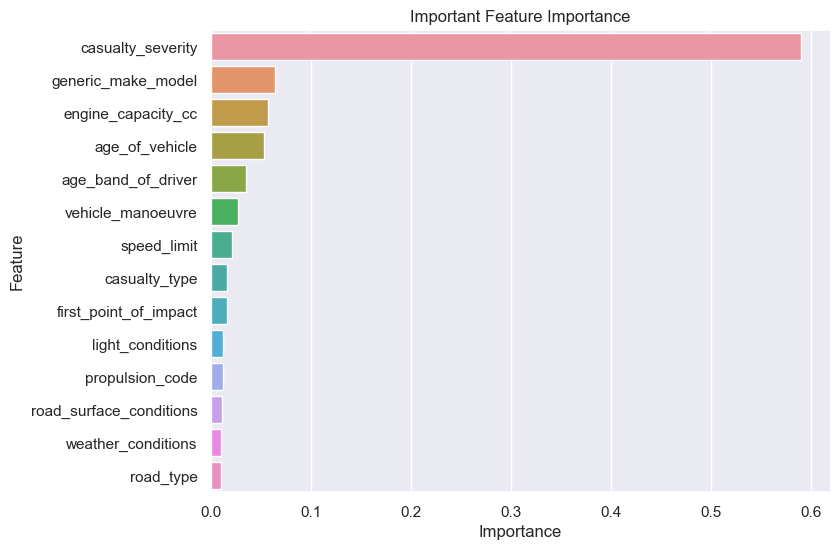

In [63]:
# Filter features with importance >= 0.01
important_features = feature_importances[feature_importances['Importance'] >= 0.01]
# Filter features with importance >= 0.01
important_features_list = important_features[important_features['Importance'] >= 0.01]['Feature'].tolist()
# Additional code to plot only the important features
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=important_features)
plt.title('Important Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Cell [690] focuses on important predictors by removing factors whose importance is less than 0.01. Then, by removing less important properties from the model, a bar plot helps to simplify it by illustrating the relative importance of these important elements.

In [64]:
# put the features back into a Pandas dataframe
Xtrain = pd.DataFrame(Xtrain, columns=important_features_list)
Xtest = pd.DataFrame(Xtest, columns=important_features_list)

# Display the updated DataFrames
print("Xtrain (with important features):")
print(Xtrain.head())

print("\nXtest (with important features):")
print(Xtest.head())

Xtrain (with important features):
        casualty_severity  generic_make_model  engine_capacity_cc  \
15887                   3                 235              2993.0   
109009                  3                  18              1968.0   
51029                   3                 126               875.0   
46066                   2                 630              5132.0   
111808                  3                 408              1198.0   

        age_of_vehicle  age_band_of_driver  vehicle_manoeuvre  speed_limit  \
15887             12.0                10.0               13.0           30   
109009            10.0                 7.0                9.0           50   
51029              7.0                11.0                4.0           30   
46066              6.0                 7.0                5.0           20   
111808             6.0                 9.0                1.0           30   

        casualty_type  first_point_of_impact  light_conditions  \
15887           

In an effort to improve prediction accuracy and save computational costs, Cell [691] reduces the size of the train and test datasets to only contain important features that were previously discovered. The `head()` method ensures that the focus of future modelling is on the important qualities by previewing the datasets.

In [65]:
# train dataset with important selected features
Xtrain.head()

,casualty_severity,generic_make_model,engine_capacity_cc,age_of_vehicle,age_band_of_driver,vehicle_manoeuvre,speed_limit,casualty_type,first_point_of_impact,light_conditions,propulsion_code,road_surface_conditions,weather_conditions,road_type
15887,3,235,2993.0,12.0,10.0,13.0,30,9.0,1.0,4,2.0,1.0,1,3
109009,3,18,1968.0,10.0,7.0,9.0,50,9.0,1.0,1,2.0,1.0,1,6
51029,3,126,875.0,7.0,11.0,4.0,30,1.0,2.0,1,1.0,1.0,1,6
46066,2,630,5132.0,6.0,7.0,5.0,20,11.0,0.0,1,2.0,1.0,1,6
111808,3,408,1198.0,6.0,9.0,1.0,30,9.0,2.0,4,1.0,1.0,1,6


By concentrating on variables that are more predictive of the desired result, the training dataset is streamlined in Cell [692] so that only features with high significance scores are included. This improves model performance and efficiency.

**Scaling**

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_vals = scaler.fit_transform(Xtrain)
Xtrain = pd.DataFrame(scaled_vals, columns=Xtrain.columns)

# inspect the data
Xtrain.head()

,casualty_severity,generic_make_model,engine_capacity_cc,age_of_vehicle,age_band_of_driver,vehicle_manoeuvre,speed_limit,casualty_type,first_point_of_impact,light_conditions,propulsion_code,road_surface_conditions,weather_conditions,road_type
0,0.468891,-0.524511,0.951316,0.613372,1.654772,-0.019398,-0.589246,0.079974,-0.675595,1.229884,0.125295,-0.5305,-0.301897,-1.376054
1,0.468891,-1.563979,0.156808,0.244816,-0.018043,-0.693938,0.753990,0.079974,-0.675595,-0.597027,0.125295,-0.5305,-0.301897,0.521295
2,0.468891,-1.046640,-0.690409,-0.308018,2.212377,-1.537112,-0.589246,-0.903702,0.228724,-0.597027,-0.509876,-0.5305,-0.301897,0.521295
3,-1.868781,1.367607,2.609319,-0.492296,-0.018043,-1.368477,-1.260864,0.325893,-1.579913,-0.597027,0.125295,-0.5305,-0.301897,0.521295
4,0.468891,0.304189,-0.440042,-0.492296,1.097167,-2.043017,-0.589246,0.079974,0.228724,1.229884,-0.509876,-0.5305,-0.301897,0.521295


To ensure that every feature contributes equally to the model, Cell [693] uses scikit-learn's `StandardScaler` to normalise the training data by eliminating the mean and scaling to unit variance. The features with uniform scaling are previewed in the output.

In [67]:
scaled_vals = scaler.transform(Xtest)
Xtest = pd.DataFrame(scaled_vals, columns=Xtest.columns)
Xtest.head()

,casualty_severity,generic_make_model,engine_capacity_cc,age_of_vehicle,age_band_of_driver,vehicle_manoeuvre,speed_limit,casualty_type,first_point_of_impact,light_conditions,propulsion_code,road_surface_conditions,weather_conditions,road_type
0,-1.868781,0.514956,-0.129990,0.429094,-0.575647,0.823776,-1.260864,0.079974,1.133042,1.229884,-0.509876,-0.5305,-0.301897,0.521295
1,0.468891,-1.439435,0.179287,-0.308018,-0.575647,-0.356668,-1.260864,-0.903702,2.037361,-0.597027,-0.509876,-0.5305,-0.301897,0.521295
2,0.468891,1.214322,0.169210,-0.492296,-1.690857,0.823776,-0.589246,0.079974,-0.675595,1.838854,-0.509876,-0.5305,-0.301897,0.521295
3,0.468891,0.294608,0.179287,2.087595,1.097167,0.486506,-0.589246,-1.026662,2.037361,-0.597027,0.125295,-0.5305,-0.301897,-2.640953
4,0.468891,0.323349,-0.159445,0.429094,0.539562,0.823776,-0.589246,0.079974,1.133042,1.229884,0.125295,-0.5305,-0.301897,0.521295


To ensure consistent scaling, Cell [694] applies the {StandardScaler}, which was first fitted on the training data, to the test dataset. By standardising each feature to zero mean and unit variance, this stage ensures consistency between the training and testing phases.

In [68]:
Xtrain.shape

(69598, 14)

In [69]:
Xtest.shape

(29856, 14)

**Exporting the data**

In [70]:
# put X and y together before exporting
trainset = Xtrain.copy()
trainset["accident_severity"] = ytrain.values
testset = Xtest.copy()
testset["accident_severity"] = ytest.values



In [71]:
trainset.to_excel("trainset-accident1.xlsx", index=False)


In [72]:
testset.to_excel("testset-accident1.xlsx", index=False)

For the train and test datasets, cell [697] aggregates features and the target variable into single dataframes. These are subsequently exported to Excel files called "trainset-accident1.xlsx" and "testset-accident1.xlsx" in cells [698] and [699], where row indices are omitted using 'index=False'.